# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []

print("Pulling City Data")
print("-"*30)
count = 0
set = 1
for n, city in enumerate(cities):
    count = count + 1

    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("-"*30)
print("Done Pulling City Data")
print("-"*30)



Pulling City Data
------------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | rosarito
Processing Record 6 of Set 1 | moron
Processing Record 7 of Set 1 | kununurra
Processing Record 8 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 1 | santiago
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | port-gentil
Processing Record 12 of Set 1 | santa cruz
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | batagay-alyta
Processing Record 15 of Set 1 | balaka
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | sinkat
City not found. Skipping...
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | karpathos
Processing Record 22 of Set 1 | zh

In [6]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

City          557
Latitude      557
Longitude     557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_weather_df.to_csv("City_data.csv", index=False, header=True)
city_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alofi,-19.0595,-169.9187,75.09,94.0,75.0,10.36,NU,1.665500e+09
1,upernavik,72.7868,-56.1549,20.10,68.0,100.0,4.43,GL,1.665500e+09
2,ushuaia,-54.8000,-68.3000,49.66,46.0,75.0,11.50,AR,1.665500e+09
3,georgetown,5.4112,100.3354,83.89,79.0,20.0,5.75,MY,1.665500e+09
4,rosarito,32.3333,-117.0333,66.47,81.0,36.0,4.38,MX,1.665500e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
latitudes = city_weather_df["Latitude"]
max_temps = city_weather_df["Max Temp"]
humidity = city_weather_df["Humidity"]
cloudiness = city_weather_df["Cloudiness"]
wind_speed = city_weather_df["Wind Speed"]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

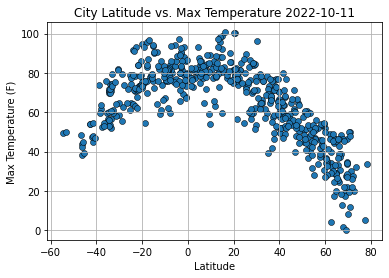

In [27]:
date_time = datetime.date(datetime.now())

plt.scatter(latitudes, max_temps,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=1, label="Cities")

plt.title(f"City Latitude vs. Max Temperature {date_time}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("latitude_temp.png")
plt.show


## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

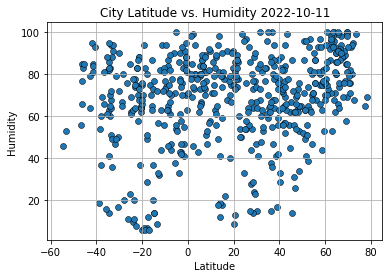

In [28]:
plt.scatter(latitudes, humidity,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=1, label="Cities")

plt.title(f"City Latitude vs. Humidity {date_time}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("latitude_humidity.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

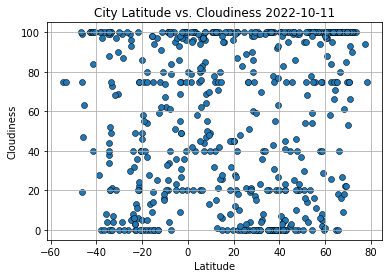

In [29]:
plt.scatter(latitudes, cloudiness,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=1, label="Cities")

plt.title(f"City Latitude vs. Cloudiness {date_time}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("latitude_cloudiness.png")
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

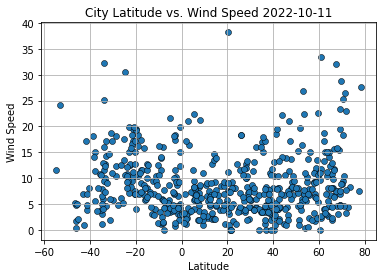

In [30]:
plt.scatter(latitudes, wind_speed,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=1, label="Cities")

plt.title(f"City Latitude vs. Wind Speed {date_time}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("latitude_windspeed.png")
plt.show

## Linear Regression

In [33]:
def linear_regression_plot(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7428545759137204


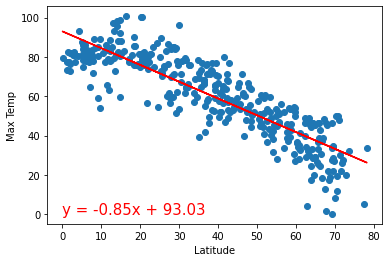

In [44]:
northern_hemisphere_df = city_weather_df.loc[(city_weather_df["Latitude"] >= 0)]
southern_hemisphere_df = city_weather_df.loc[(city_weather_df["Latitude"] < 0)]

x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Max Temp"]


linear_regression_plot(x_values, y_values, 'Max Temp',(0,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4614822879343583


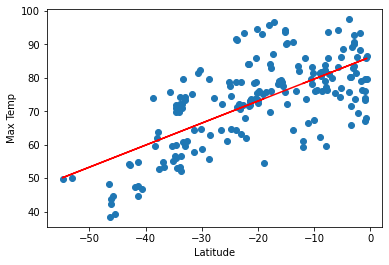

In [45]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Max Temp"]


linear_regression_plot(x_values, y_values, 'Max Temp',(0,0))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03436851811949263


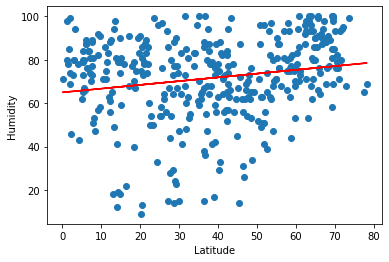

In [46]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Humidity"]


linear_regression_plot(x_values, y_values, 'Humidity',(0,0))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0003688531567200726


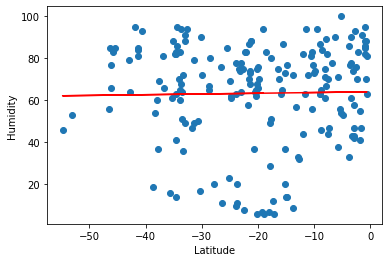

In [47]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Humidity"]


linear_regression_plot(x_values, y_values, 'Humidity',(0,0))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013025144226438948


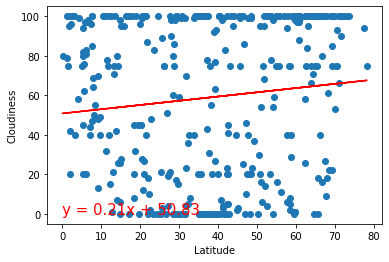

In [48]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Cloudiness"]


linear_regression_plot(x_values, y_values, 'Cloudiness',(0,0))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0016756136117458463


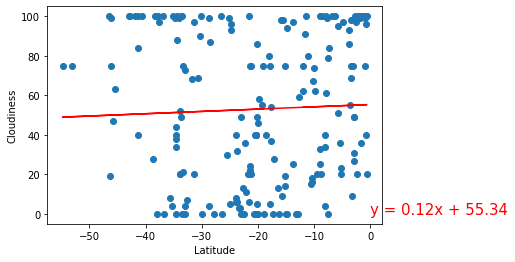

In [49]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Cloudiness"]


linear_regression_plot(x_values, y_values, 'Cloudiness',(0,0))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04983180528450539


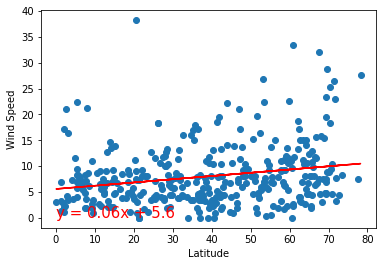

In [50]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Wind Speed"]


linear_regression_plot(x_values, y_values, 'Wind Speed',(0,0))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01885626024784926


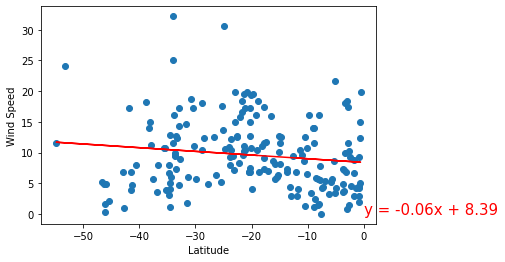

In [51]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Wind Speed"]


linear_regression_plot(x_values, y_values, 'Wind Speed',(0,0))